In [3]:
import importlib
import random
import sys

import generate

# reload if generate.py has changed
importlib.reload(generate)

results = generate.generate()

Generating m01_basic
  Temperature 0.0
    Trial 1 of 3
        attic table -> furniture
        queen finger -> royalty
        pair chocolate -> fondue
        pilot hard -> cockpit
        dough skate -> kneadboards
        queen diamond -> monarchy
        punch pair -> fruit
        mushroom summit -> fungi
        genius punch -> smartstrike
        truck ladder -> fireman
    Trial 2 of 3
        attic table -> storage
        queen finger -> royalty
        pair chocolate -> fondue
        pilot hard -> cockpit
        dough skate -> kneadboards
        queen diamond -> monarchy
        punch pair -> fruit
        mushroom summit -> fungi
        genius punch -> smartstrike
        truck ladder -> fireman
    Trial 3 of 3
        attic table -> furniture
        queen finger -> royalty
        pair chocolate -> fondue
        pilot hard -> cockpit
        dough skate -> kneadboards
        queen diamond -> monarchy
        punch pair -> fruit
        mushroom summit -> fungi
  

Method, Temperature, 10%, 50%, 90%
m01_basic, 0.0, 1.00, 2.00, 3.10
m01_basic, 0.5, 1.00, 2.00, 3.10
m01_basic, 0.9, 1.00, 2.00, 4.00


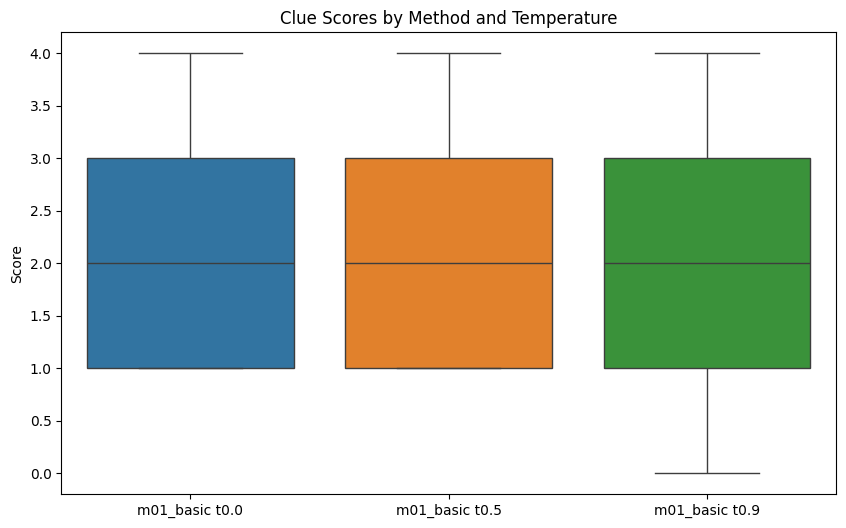

In [4]:
import evaluate

# reload if evaluate.py has changed
importlib.reload(evaluate)

evaluate.evaluate(results)